# Part 3

## Processing Pipelines

This part will show you everything you need to know about spaCy's processing pipeline. You'll learn what goes on under the hood when you process a text, how to write your own components and add them to the pipeline, and how to use custom attributes to add your own metadata to the documents, spans and tokens.

## A. Processing pipelines

### What happens when you call nlp?

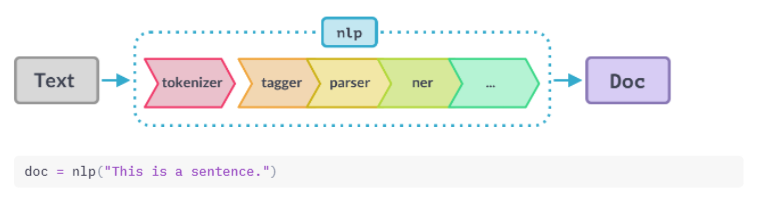

Pass a string of text to the `nlp` object, and receive a `Doc` object.

But what does the `nlp` object *actually* do?

First, the tokenizer is applied to turn the string of text into a `Doc` object. Next, a series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed doc is returned, so you can work with it.

### Built-in pipeline components

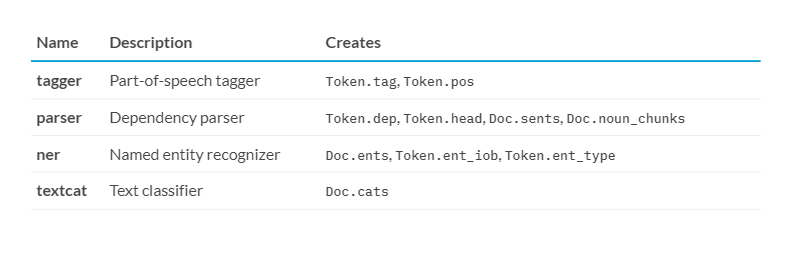

Here are some of the most common built-in pipeline components that you'll want to use in your projects.

The part-of-speech tagger sets the `token.tag` and `token.pos` attributes.

The dependency parser adds the `token.dep` and `token.head` attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the `doc.ents` property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the `doc.cats` property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

### Under the hood

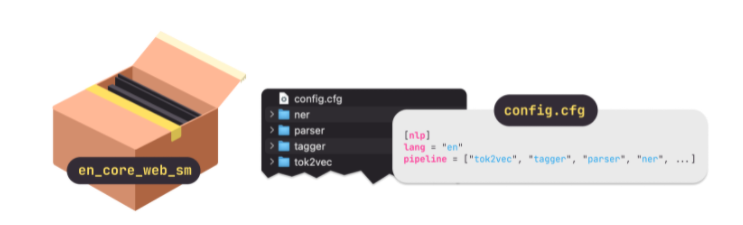

All pipeline packages you can load include several files and a `config.cfg`.

The config defines things like the language and pipeline. This tells which components to instantiate and how they should be configured.

The built-in components that make predictions also need binary data. The data is included in the pipeline package and loaded into the component when you load the pipeline.

### Pipeline attributes

To see the names of the pipeline components present in the current nlp object, you can use the `nlp.pipe_names` attribute.

For a list of component name and component function tuples, you can use the `nlp.pipeline` attribute.

The component functions are the functions applied to the doc to process it and set attributes – for example, part-of-speech tags or named entities.

## B. Inspecting the pipeline

Let’s inspect the small English pipeline.

- Load the `en_core_web_sm` pipeline and create the `nlp` object.
- Print the names of the pipeline components using `nlp.pipe_names`.
- Print the full pipeline of `(name, component)` tuples using `nlp.pipeline`.

In [ ]:
import spacy

# Load the en_core_web_sm pipeline
nlp = ____

# Print the names of the pipeline components
print(____.____)

# Print the full pipeline of (name, component) tuples
print(____.____)

## C. Custom pipeline components

Now that you know how the pipeline works, let's take a look at **custom** pipeline components.

Custom pipeline components let you add your own function to the pipeline that is executed when you call the nlp object on a text.

### Why custom components?

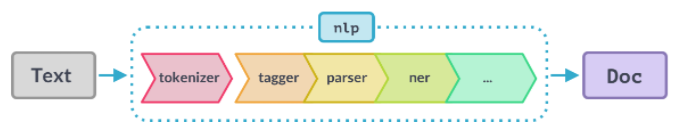

- Make a function execute automatically when you call `nlp`
- Add your own metadata to documents and tokens
- Updating built-in attributes like `doc.ents`

### Anatomy of a component

- Function that takes a `doc`, modifies it and returns it
- Registered using the `Language.component` decorator
- Can be added using the `nlp.add_pipe` method

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

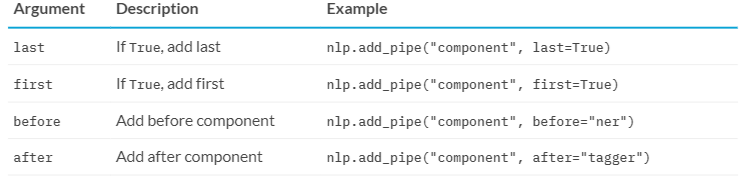

### Example: a simple component

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Process a text
doc = nlp("Hello world!")

## D. Simple components

Make a custom component that prints the number of tokens in a document.

- Add the `"length_component"` to the existing pipeline as the **first** component.
- Try out the new pipeline and process any text with the `nlp` object – for example “This is a sentence.”.

In [ ]:
import spacy
from spacy.language import Language

# Define the custom component
def length_component_function(doc):
    
    
    
    return doc

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names



# Process a text
doc = ____

## E. Complex components

In this exercise, you’ll be writing a custom component that uses the `PhraseMatcher` to find animal names in the document and adds the matched spans to the `doc.ents`. A `PhraseMatcher` with the animal patterns has already been created as the variable `matcher`.

- Define the custom component and apply the `matcher` to the `doc`.
- Create a `Span` for each match, assign the label ID for `"ANIMAL"` and overwrite the `doc.ents` with the new spans.
- Add the new component to the pipeline after the `"ner"` component.
- Process the text and print the entity text and entity label for the entities in `doc.ents`.

In [ ]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = ____
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(____, ____, ___, label=____) for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
____.____(____, ____=____)
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(____, ____) for ent in ____])

## F. Extension attributes

### Setting custom attributes

Custom attributes let you add any metadata to docs, tokens and spans. The data can be added once, or it can be computed dynamically.

Custom attributes are available via the `._` (dot underscore) property.

Attributes need to be registered on the global `Doc`, `Token` and `Span` classes, you can use the `set_extension` method to do so.

The first argument is the attribute name. Keyword arguments let you define how the value should be computed. In this case, it has a default value and can be overwritten.

In [ ]:
doc._.title = "My document"
token._.is_color = True
span._.has_color = False

In [ ]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

### Extension attribute types

There are three types of extensions: attribute extensions, property extensions and method extensions.

1. Attribute extensions
2. Property extensions
3. Method extensions

### Attribute extensions

Attribute extensions set a default value that can be overwritten.

For example, a custom `is_color` attribute on the token that defaults to `False`.

On individual tokens, its value can be changed by overwriting it – in this case, True for the token "blue".

In [ ]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

### Property extensions

Property extensions work like properties in Python: they can define a getter function and an optional setter.

The getter function is only called when you retrieve the attribute. This lets you compute the value dynamically, and even take other custom attributes into account.

Getter functions take one argument: the object, in this case, the token. In this example, the function returns whether the token text is in our list of colors.

We can then provide the function via the `getter` keyword argument when we register the extension.

The token "blue" now returns `True` for `._.is_color`.

In [ ]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

If you want to set extension attributes on a span, you almost always want to use a property extension with a getter. Otherwise, you'd have to update *every possible span ever* by hand to set all the values.

In this example, the `get_has_color` function takes the span and returns whether the text of any of the tokens is in the list of colors.

After we've processed the doc, we can check different slices of the doc and the custom `._.has_color` property returns whether the span contains a color token or not.

In [ ]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

### Method extensions

Method extensions make the extension attribute a callable method.

You can then pass one or more arguments to it, and compute attribute values dynamically – for example, based on a certain argument or setting.

In this example, the method function checks whether the doc contains a token with a given text. The first argument of the method is always the object itself – in this case, the doc. It's passed in automatically when the method is called. All other function arguments will be arguments on the method extension. In this case, `token_text`.

Here, the custom `._.has_token` method returns `True` for the word "blue" and `False` for the word "cloud".

In [ ]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

## G. Setting extension attributes

#### Part 1

- Use `Token.set_extension` to register `"is_country"` (default `False`).
- Update it for `"Spain"` and print it for all tokens.

In [ ]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Register the Token extension attribute "is_country" with the default value False


# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
____ = True

# Print the token text and the is_country attribute for all tokens
print([(____, ____) for token in doc])

#### Part 2

- Use `Token.set_extension` to register `"reversed"` (getter function `get_reversed`).
- Print its value for each token.

In [ ]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension "reversed" with the getter get_reversed



# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for ____ in ____:
    print("reversed:", ____)

#### Part 3

- Complete the `get_has_number` function .
- Use `Doc.set_extension` to register `"has_number"` (getter `get_has_number`) and print its value.

In [ ]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("en")

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(____ for token in doc)


# Register the Doc property extension "has_number" with the getter get_has_number



# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", ____)

#### Part 4

- Use `Span.set_extension` to register `"to_html"` (method `to_html`).
- Call it on `doc[0:2]` with the tag `"strong"`.

In [ ]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("en")

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return f"<{tag}>{span.text}</{tag}>"


# Register the Span method extension "to_html" with the method to_html



# Process the text and call the to_html method on the span with the tag name "strong"
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(____)

## H. Entities and extensions

In this exercise, you’ll combine custom extension attributes with the statistical predictions and create an attribute getter that returns a Wikipedia search URL if the span is a person, organization, or location.

- Complete the `get_wikipedia_url` getter so it only returns the URL if the span’s label is in the list of labels.
- Set the `Span` extension `"wikipedia_url"` using the getter `get_wikipedia_url`.
- Iterate over the entities in the `doc` and output their Wikipedia URL.

In [ ]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")


def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if ____ in ("PERSON", "ORG", "GPE", "LOCATION"):
        # Don't forget to turn " " into "_"
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text


# Set the Span extension wikipedia_url using the getter get_wikipedia_url



doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(____, ____)

## I. Components with extensions

Extension attributes are especially powerful if they’re combined with custom pipeline components. In this exercise, you’ll write a pipeline component that finds country names and a custom extension attribute that returns a country’s capital, if available.

A phrase matcher with all countries is available as the variable `matcher`. A dictionary of countries mapped to their capital cities is available as the variable `CAPITALS`.

- Complete the `countries_component_function` and create a `Span` with the label `"GPE"` (geopolitical entity) for all matches.
- Add the component to the pipeline.
- Register the Span extension attribute `"capital"` with the getter `get_capital`.
- Process the text and print the entity text, entity label and entity capital for each entity span in `doc.ents`.

In [ ]:
import json
import spacy
from spacy.language import Language
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json", encoding="utf8") as f:
    CAPITALS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", list(nlp.pipe(COUNTRIES)))


@Language.component("countries_component")
def countries_component_function(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [____(____, ____, ____, label=____) for match_id, start, end in matches]
    return doc


# Add the component to the pipeline


print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital



# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(____, ____, ____) for ent in doc.ents])

## J. Scaling and performance

### Processing large volumes of text

If you need to process a lot of texts and create a lot of `Doc` objects in a row, the `nlp.pipe` method can speed this up significantly.

It processes the texts as a stream and yields `Doc` objects.

It is much faster than just calling nlp on each text, because it batches up the texts.

`nlp.pipe` is a generator that yields `Doc` objects, so in order to get a list of docs, remember to call the `list` method around it.


**BAD:**

In [ ]:
docs = [nlp(text) for text in LOTS_OF_TEXTS]

**GOOD:**

In [ ]:
docs = list(nlp.pipe(LOTS_OF_TEXTS))

### Passing in context

`nlp.pipe` also supports passing in tuples of text / context if you set `as_tuples` to `True`.

The method will then yield doc / context tuples.

This is useful for passing in additional metadata, like an ID associated with the text, or a page number.

In [ ]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

You can even add the context metadata to custom attributes.

In this example, we're registering two extensions, `id` and `page_number`, which default to `None`.

After processing the text and passing through the context, we can overwrite the doc extensions with our context metadata.

In [ ]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

### Using only the tokenizer

Another common scenario: Sometimes you already have a model loaded to do other processing, but you only need the tokenizer for one particular text.

Running the whole pipeline is unnecessarily slow, because you'll be getting a bunch of predictions from the model that you don't need.

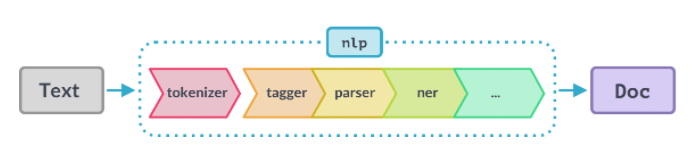

If you only need a tokenized `Doc` object, you can use the `nlp.make_doc` method instead, which takes a text and returns a doc.

This is also how spaCy does it behind the scenes: `nlp.make_doc` turns the text into a doc before the pipeline components are called.

**BAD:**

In [ ]:
doc = nlp("Hello world")

**GOOD:**

In [ ]:
doc = nlp.make_doc("Hello world!")

### Disabling pipeline components

You also can temporarily disable pipeline components using the `nlp.select_pipes` context manager.

It accepts the keyword arguments `enable` or `disable` that can define a list of string names of the pipeline components to disable. For example, if you only want to use the entity recognizer to process a document, you can temporarily disable the tagger and parser.

After the `with` block, the disabled pipeline components are automatically restored.

In the `with` block, only the remaining components will run.

In [ ]:
# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

## K. Processing streams

In this exercise, you’ll be using `nlp.pipe` for more efficient text processing. The `nlp` object has already been created for you. A list of tweets about a popular American fast food chain are available as the variable `TEXTS`.

#### Part 1
- Rewrite the example to use `nlp.pipe`. Instead of iterating over the texts and processing them, iterate over the `doc` objects yielded by `nlp.pipe`.

In [ ]:
import json
import spacy

nlp = spacy.load("en_core_web_sm")

with open("exercises/en/tweets.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

# Process the texts and print the adjectives
for text in TEXTS:
    doc = nlp(text)
    print([token.text for token in doc if token.pos_ == "ADJ"])

#### Part 2
- Rewrite the example to use `nlp.pipe`. Don’t forget to call `list()` around the result to turn it into a list.

In [ ]:
import json
import spacy

nlp = spacy.load("en_core_web_sm")

with open("exercises/en/tweets.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

# Process the texts and print the entities
docs = [nlp(text) for text in TEXTS]
entities = [doc.ents for doc in docs]
print(*entities)

#### Part 3
- Rewrite the example to use `nlp.pipe`. Don’t forget to call `list()` around the result to turn it into a list.

In [ ]:
import spacy

nlp = spacy.blank("en")

people = ["David Bowie", "Angela Merkel", "Lady Gaga"]

# Create a list of patterns for the PhraseMatcher
patterns = list(nlp.pipe(people))

## L. Processing data with context

In this exercise, you’ll be using custom attributes to add author and book meta information to quotes.

A list of `[text, context]` examples is available as the variable `DATA`. The texts are quotes from famous books, and the contexts dictionaries with the keys `"author"` and `"book"`.

- Use the `set_extension` method to register the custom attributes `"author"` and `"book"` on the `Doc`, which default to `None`.
- Process the `[text, context]` pairs in `DATA` using `nlp.pipe` with `as_tuples=True`.
- Overwrite the `doc._.book` and `doc._.author` with the respective info passed in as the context.

In [ ]:
import json
import spacy
from spacy.tokens import Doc

with open("exercises/en/bookquotes.json", encoding="utf8") as f:
    DATA = json.loads(f.read())

nlp = spacy.blank("en")

# Register the Doc extension "author" (default None)
____

# Register the Doc extension "book" (default None)
____

for doc, ____ in ____(____, ____):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = ____
    doc._.author = ____

    # Print the text and custom attribute data
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

## K. Selective processing

In this final exercise, you’ll use the `nlp.select_pipes` methods to only run selected components when processing a text.

- Disable the tagger and lemmatizer using the `nlp.select_pipes` method.
- Process the text and print all entities in the `doc`.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Disable the tagger and lemmatizer
with ____.____(____):
    # Process the text
    doc = ____
    # Print the entities in the doc
    print(____)